<h2> 1. Etude du Problème d'optimisation


**1. Interpréter la définition de l’énergie auto-consommée (3). Justifier que l’on peut de façon équivalente
considérer la quantité $\sum^N_{i=1}\min(\^{E_i},P_i\Delta t)$ avec $\^{E_i} = E^{PV}_{i} -\omega_{i}$
. Quelle difficulté comporte ce coût (tout comme le précédent) dans le cadre d’un
problème d’optimisation ?**



L'énergie auto-consommée est soit l'énergie totale produite par les panneaux photovoltaïques c'est-à-dire $ E^{PV}_{i}$ si elle ne couvre pas tous les besoins en énergie du batîment ($E^{PV}_{i} < \omega_{i} +P_{i} \Delta t $). 
Sinon, au contraire, quand l'énergie produite est largement suffisante aux besoins ($\omega_{i} +P_{i}\Delta t < E^{PV}_{i} $), l'énergie auto-consommée est l'énergie nécessaire aux besoins soit $\omega_{i} +P_{i}$.

Pour représenter ces deux cas, la formulation  $ \min( E^{PV}_{i},\omega_{i}+\Delta t P_{i}) $ est la plus adaptée. 

$\omega_{i}$ n'est pas une demande pilotable. Il s'agit alors d'une contrainte au point du vue de l'optimisation. Ainsi considérer $ min( E^{PV}_{i},\omega_{i}+\Delta t P_{i}) $ équivaut à étudier $\min(E^{PV}_{i} - \omega_{i},P_{i} \Delta t )$ c'est-à-dire $\min(\^{E_i},P_i\Delta t)$.

Puisque l'on s'intérrèsse à l'énergie auto-consommé du bâtiment sur un intervalle de temps $[t_0;t_f]$, on fait alors la somme des énergies auto-consommées à chaque pas de temps : $\sum^N_{i=1}\min(\^{E_i},P_i\Delta t)$.

La fonction à optimiser est une somme, elle n'est donc pas continue et a fortiori non convexe, ce qui rajoute une difficulté. 

**2. En lieu et place de  $\sum^N_{i=1}\min(\^{E_i}, P_i\Delta t)$, on se propose de maximiser la fonction dite de "soft-min" :  $\sum^N_{i=1}h(\^{E_i},P_i\Delta t)$ où $h :(x_1,x_2) \in \mathbb{R}^2\rightarrow \frac{x_{1}e^{-\alpha x_{1}}+ x_{2}e^{-\alpha x_{2}}}{e^{-\alpha x_{1}}+e^{-\alpha x_{2}}} $
avec $\alpha > 0$, une constante. Justifier que, pour $\alpha$ grand, $h$ est une bonne approximation de la fonction min.
Quel intérêt a-t-on alors à considérer ce problème approché plutôt que le problème original ?**

Supposons, quitte à inverser $x_{1}$ et $x_{2}$ car ils jouent des rôles symétriques, que $x_{1}<x_{2}$.

On a $$ h(x_{1},x_{2})=\frac{x_{1}e^{-\alpha x_{1}}+ x_{2}e^{-\alpha x_{2}}}{e^{-\alpha x_{1}}+e^{-\alpha x_{2}}} = \frac{(x_{1}+x_{2}e^{-\alpha(x_{2}-x_{1})}) e^{-\alpha x_{1}}}{(1+e^{-\alpha(x_{2}-x_{1})}) e^{-\alpha x_{1}}} = \frac{x_{1}+x_{2}e^{-\alpha(x_{2}-x_{1})}}{1+e^{-\alpha (x_{2}-x_{1})}} $$
Alors, pour $ \alpha \ll 1 $, on a $h(x_{1},x_{2})=x_{1}$.
Et inversement si $x_{1}>x_{2}$, on obtient $h(x_{1},x_{2})=x_{2}$
D'où, pour $\alpha$ grand, $h(x_{1},x_{2}) \approx \min(x_{1},x_{2}) $.

On a plus intéret à étudier cette fonction soft min car celle-ci est continue et convexe. 

**3. Interpréter l’équation $T_{i+1}= e^{-k\Delta t}T_i + \frac{1 - e^{-k\Delta t}}{k}C(-Q_i +P_i)$. Cette modélisation vous semble-t-elle raisonnable ?**

On applique le premier principe de la thermodynamique industrielle au sytème ouvert qu'est le ballon, on a: (puisqu'il n'y a aucune pièce en mouvement)
$$ \frac{dH}{dt} = P_{th} +D_{m_{e}}(t) h_{e}(t) - D_{m_{s}}(t) h_{s}(t) $$ 

Avec  $P_{th}$ la puissante purement thermique, elle correspond à la puissance totale transférée au réservoir, en retirant "la puissance de soutirage" c'est à dire finalement que $P_{th}=(P_{i} - Q_{i})$. 
On suppose les débits massiques en entrée et en sortie tel que : $D_{m_{e}} = 0 $,$ D_{m_{s}} = D_{m}$ constante. 

De plus, pour un corps pur monophasé assimilé à une phase condensée idéale, on a $h_{e}(t)=\frac{C_{p}}{m} T(t)$

Il vient alors que $$ C_{p} \frac{dT}{dt} = P_{th} + D_{m}\frac{C_{p}}{m} T(t) $$

Alors, $$ \frac{dT}{dt}  - \frac{D_{m}}{m} T(t)= \frac{P_{th}}{C_{p}} $$. On pose $ k=\frac{D_{m}}{m}$ et on résoud l'équations différentielles avec la solution homogène et la solution particulière. On obtient alors : 
$$T(t) = A e^{-k t} + \frac{(P_{i} - Q_{i}) m }{C_{p} D_{m}} $$

On impose $C_p =\frac{1}{C} $ et $T_{i}=T(t=0)$ d'où $ A=T_{i}-\frac{(P_{i} - Q_{i}) C}{k} $ et on impose $ T(\Delta t ) = T_{i+1} $ donc $$ T_{i+1}=T_{i} e^{-k \Delta t } +  \frac{(P_{i} - Q_{i}) C}{k} (1-e^{-k \Delta t }) $$

**4. Formuler le problème d’optimisation à résoudre sous la forme :
$ \min f(x)$
tel que $c_{eq}(x) = 0$ et $ c_{in}(x) ≤ 0$. On précisera les variables de décision x, leur nombre n, les contraintes $c_{eq}$ et $c_{in}$ ainsi que la fonction
objectif f à minimiser.**

On pose alors le problème d'optimisation suivant: 
On pose $$ f(x)= - \Sigma^{N+1}_{i=2} h(E^{PV}_{i} - \omega_{i},x_{i} \Delta t) $$ (Le moins vient du fait que l'on ait de maximiser cette énergie auto-consommée.)

Cette fonction prend en argument les premières coordonnées du vecteurs : $$ x= \begin{pmatrix}
P_{0}\\ 
P_{1}\\
... \\
P_{N}\\
T_{0}\\
T_{1}\\
... \\
T_{N} \\
\end{pmatrix} $$ 


On introduit alors la contraintes $$  c_{eq}(x)= \begin{pmatrix}  
x_{N+2} - T_{in} \\
x_{N+3}- x_{N+2} e^{-k \Delta t } +  \frac{(x_{1} - Q_{1}) C}{k} (1-e^{-k \Delta t }) \\
x_{N+4}-x_{N+3}  e^{-k \Delta t } +  \frac{(x_{2} - Q_{2}) C}{k} (1-e^{-k \Delta t }) \\
...\\ 
x_{N+1}
\end{pmatrix} $$ qui vient de l'équation : $T_{i+1}=T_{i} e^{-k \Delta t } +  \frac{(P_{i} - Q_{i}) C}{k} (1-e^{-k \Delta t }) $

Et la seconde contrainte inégalité :
$$ c_{in}(x) =  \begin{pmatrix}  
x_{1} - P_{M}\\
... \\
x_{N+1} - P_{M} \\
x_{N+2}-T_{sat} \\
... \\
x_{2N+2}-T_{sat} \\
\end{pmatrix} $$
qui vient de la condition : $0 ≤ P_i ≤ P_M$ et $ 0 ≤ T_i ≤ T_{sat}$

 d'où
$ f(x) = -\Sigma^{i=N}_{i=1} h(E^{PV}_{i} - \omega_{i},P_{i} \Delta t) $ avec $$ c_{eq}(x)=0,  c_{in}(x) < 0 $$

<h2> 2. Etude et résolution numérique du problème soft-min

**5. Quelles méthodes de résolution peuvent être envisagées pour ce problème ?**


Au vu de la forme du problème, f étant deux fois différentiable, car $h$ l'est, on peut envisager une optimisation avec la méthode du hessien ou du hessien approché.

**6. Développer un algorithme de résolution dans le cas de l’horizon de temps $t_0 = 6h$ et $t_f = 19h$ avec
$∆t = 0.25h$, dans un cas sans usage non-pilotables ($w_i = 0$ pour tout i).**

**On tracera notamment les graphes suivants :**
- **l’évolution temporelle de la température du ballon, que l’on superposera aux bornes sur la température**
- **l’évolution temporelle de la puissance fournie au ballon, de la courbe d’énergie photovoltaïque produite et de l’énergie photovoltaïque auto-consommée correspondante au cours du temps.**

**Commenter les résultats obtenus.**

In [29]:
#les modules dont je vais avoir besoin 

import casadi as ca
import numpy as np
import matplotlib.pyplot as plt

In [30]:
#DEFINITIONS DES DIFFERENTS PARAMETRES

# Paramètres du temps et de la variable x
t0 = 6
tf= 19
deltat = 0.25
N = int((tf-t0)/deltat)

#Paramètres des contraintes et équations
alpha = 100
k = 0.2  
Tsat = 70  
Tf = 70  
Tin = 50  
C = 100  
PM = 3 

#Paramètres listes
EPV= []
Q=[]
for i in range(N+1) :
    EPV.append(2 * np.exp(-((t0+i*deltat - 13) ** 2)/ 9))
    if (t0 + i*deltat) == 12 :
        Q.append(3)
    else : 
        Q.append(0)

print(EPV)
print(Q)

[0.008640478948188132, 0.012659430854971494, 0.01829189407685574, 0.026065814897018716, 0.03663127777746836, 0.05076927498275342, 0.06939337129231302, 0.09354124476791796, 0.12435304804423264, 0.16303387724937904, 0.21079844912372867, 0.26879742126576495, 0.3380266308121322, 0.4192227743021956, 0.5127515133728245, 0.6184963858666875, 0.7357588823428847, 0.8631812409863896, 0.9987035771985524, 1.139565649461846, 1.2823607768599092, 1.4231452724835938, 1.5576015661428098, 1.6812474866690106, 1.7896786336287396, 1.8788261256269516, 1.9452089542326967, 1.9861592249806321, 2.0, 1.9861592249806321, 1.9452089542326967, 1.8788261256269516, 1.7896786336287396, 1.6812474866690106, 1.5576015661428098, 1.4231452724835938, 1.2823607768599092, 1.139565649461846, 0.9987035771985524, 0.8631812409863896, 0.7357588823428847, 0.6184963858666875, 0.5127515133728245, 0.4192227743021956, 0.3380266308121322, 0.26879742126576495, 0.21079844912372867, 0.16303387724937904, 0.12435304804423264, 0.093541244767917

In [31]:

#définitions du problèmes d'optimisation
opti = ca.Opti()
x= opti.variable(2*(N+1))

#Définitions des contraintes égalité
eq_constraints = []
eq_constraints.append(x[N + 1] == Tin)
for i in range(N+2, 2*N+1):
    eq_constraints.append(x[ i + 1] == x[i] * np.exp(-k * deltat) + ((x[i-N] - Q[i-N]) * C / k) * (1 - np.exp(-k * deltat)))
eq_constraints.append(x[-1] == Tf)

opti.subject_to(eq_constraints)

#Définitions des contraintes inégalités
ineq_constraints = []
for i in range(N):
    ineq_constraints.append(x[i + 1] <= PM)
    ineq_constraints.append(x[N + i + 1] <= Tsat)

opti.subject_to(ineq_constraints)

#contraintes de positivité des éléments de x
pos_constraints = []
for i in range(N):
    pos_constraints.append(x[i + 1] >= 0)
    pos_constraints.append(x[N + i + 1] >= 0)

opti.subject_to(pos_constraints)

In [32]:

#Définition de la fonction objectif

# Définition de la fonction h(x1, x2)
def h(x1, x2):
    global alpha
    return (x1 * np.exp(-alpha * x1) + x2 * np.exp(-alpha * x2)) / (np.exp(-alpha * x1) + np.exp(-alpha * x2))

f_obj = 0
for i in range(1, N + 1):
    f_obj -= h(EPV[i - 1], x[i] * deltat)

# Minimisation de la fonction objectif
opti.minimize(f_obj)

# Spécification du solveur
opti.solver('ipopt')

# Résolution du problème d'optimisation
sol = opti.solve()
sol_x = sol.value(x).flatten()

# Affichage de la solution
print("Solution optimale:")
print(sol_x)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:      155
Number of nonzeros in inequality constraint Jacobian.:      208
Number of nonzeros in Lagrangian Hessian.............:       52

Total number of variables............................:      106
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:       53
Total number of inequality constraints...............:      208
        inequality constraints with only lower bounds:      104
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:      104

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 -1.1365178e-02 7.32e+01 7.36e-02  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

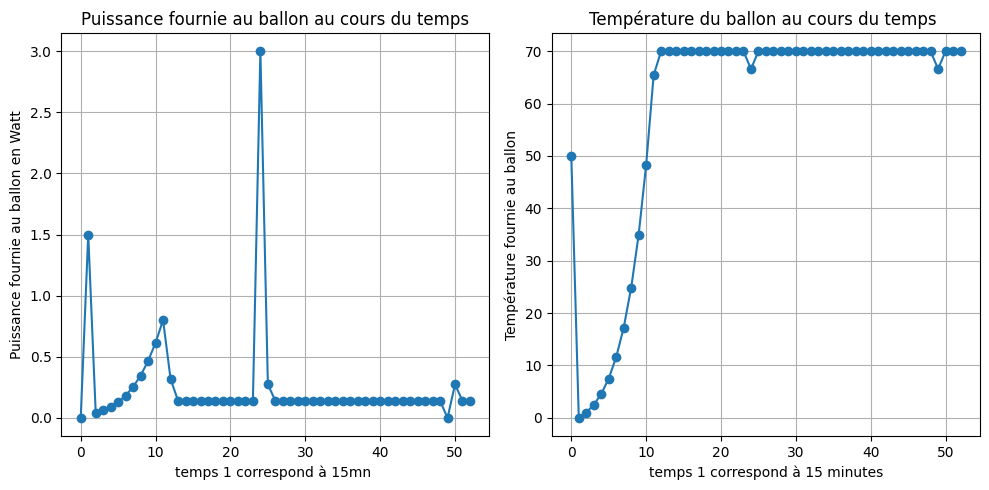

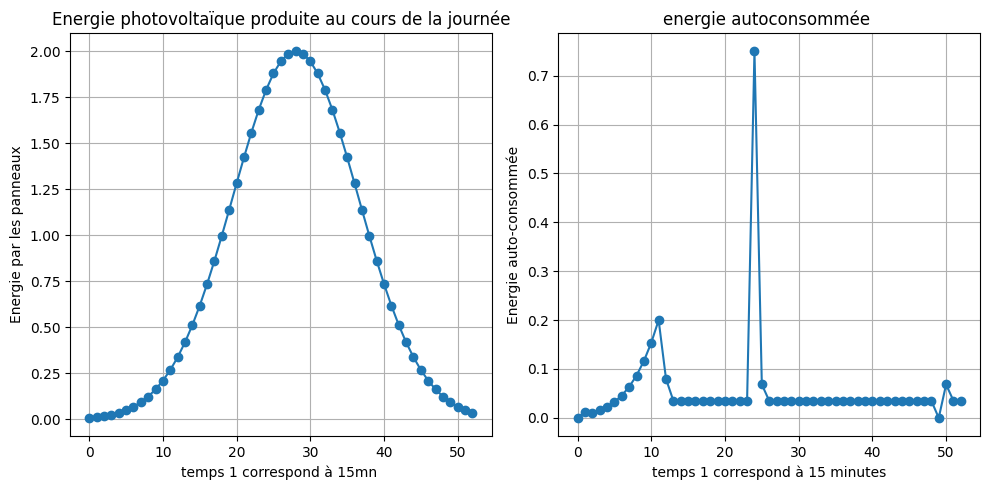

In [34]:

# Graphique des Puissances optimals
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(N+1), sol_x[:N+1], marker='o', linestyle='-')
plt.title('Puissance fournie au ballon au cours du temps')
plt.xlabel('temps 1 correspond à 15mn ')
plt.ylabel('Puissance fournie au ballon en Watt')
plt.grid(True)

# Graphique des températures optimales
plt.subplot(1, 2, 2)
plt.plot(range(N+1), sol_x[N+1:], marker='o', linestyle='-')
plt.title('Température du ballon au cours du temps ')
plt.xlabel('temps 1 correspond à 15 minutes')
plt.ylabel('Température fournie au ballon')
plt.grid(True)

# Affichage des graphiques
plt.tight_layout()
plt.show()


# Graphique de l'energie photovoltaïque
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(N+1), EPV[:], marker='o', linestyle='-')
plt.title('Energie photovoltaïque produite au cours de la journée')
plt.xlabel('temps 1 correspond à 15mn ')
plt.ylabel('Energie par les panneaux')
plt.grid(True)

# Graphique de l'énergie autoconsommée
E_autoconso =[]
for i in range(N+1): 
    if EPV[i] <= sol_x[i]*deltat :
        E_autoconso.append(EPV[i])
    else : 
        E_autoconso.append(sol_x[i]*deltat )

plt.subplot(1, 2, 2)
plt.plot(range(N+1), E_autoconso[:], marker='o', linestyle='-')
plt.title('energie autoconsommée ')
plt.xlabel('temps 1 correspond à 15 minutes')
plt.ylabel('Energie auto-consommée')
plt.grid(True)

# Affichage des graphiques
plt.tight_layout()
plt.show()

<h2> 3. Etude et résolution numérique du problème avec variable slack

**7. On se propose d’introduire $N + 1$ variables additionnelles $s_i$, telles que $s_i ≤ E^{PV}_i$
et $s_i ≤ P_i$ pour tout $i = 0, ..., N $. Reformuler le problème d’optimisation à l’aide de ces variables.**

**8. Etudier la convexité de ce nouveau problème. Appartient-il à une famille particulière de problème
d’optimisation ? Quels avantages/inconvénients présente-t-il par rapport à la formulation précédente ?**

**9. Résoudre ce nouveau problème avec les mêmes paramètres que précédemment. Comparer les solutions
obtenues.**

<h2> 4. Pilotage d’usages blancs et introduction à l’optimisation entière

**10. On suppose dans un premier temps que le cycle de la machine à laver est lancée à un temps ti0 fixe
donné. Ecrire le problème d’optimisation correspondant.**

**11. A l’aide de ce sous-problème, proposer une approche combinatoire exhaustive permettant de résoudre
le problème originel. L’implémenter avec les mêmes paramètres que précédemment ainsi que $n_L = 6$
et $\bar{P_L} = 0.25W$. Commenter le résultat obtenu. Etudier l’extensibilité de cette technique de résolution au cas de plusieurs autres usages pilotables.**

**12. Au vu de la question précédente, on cherche une autre technique de résolution. Malheureusement,
le comportement (9) ne peut être modélisé par des variables continues. On définit donc N variables
binaires $δi ∈ {0, 1}$ vérifiant, pour $M \gg 1$ une grande constante,**
- **Justifier que (10) est bien équivalent à (9). Ce type d’écriture de contraintes porte le nom de
"technique du grand M". Justifier ce nom.**
- **Ecrire le problème d’optimisation correspondant, avec des variables de décision continues et binaires. Ce type de problème est nommé "Mixed-Integer" et peut être résolution par l’algorithme
de Branch and Bound proposé ci-dessous. Détailler comment l’appliquer au cas présent.**
